# Imports

In [168]:
import os
import numpy as np
import pandas as pd
from scipy.io import wavfile
import seaborn as sns
import pandas as pd
import scipy.signal as sps

import librosa
import librosa.display

import matplotlib.pyplot as plt
import IPython.display as ipd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import KFold

path = 'CiceseBank/wav/'

sns.set(style="ticks", context="talk", rc={'figure.figsize':(20,10), 'figure.dpi':300})
plt.style.use("dark_background")

# Play Audio

In [169]:
audio_path = path+'010_003.wav'
ipd.Audio(audio_path)

# Plot Audio

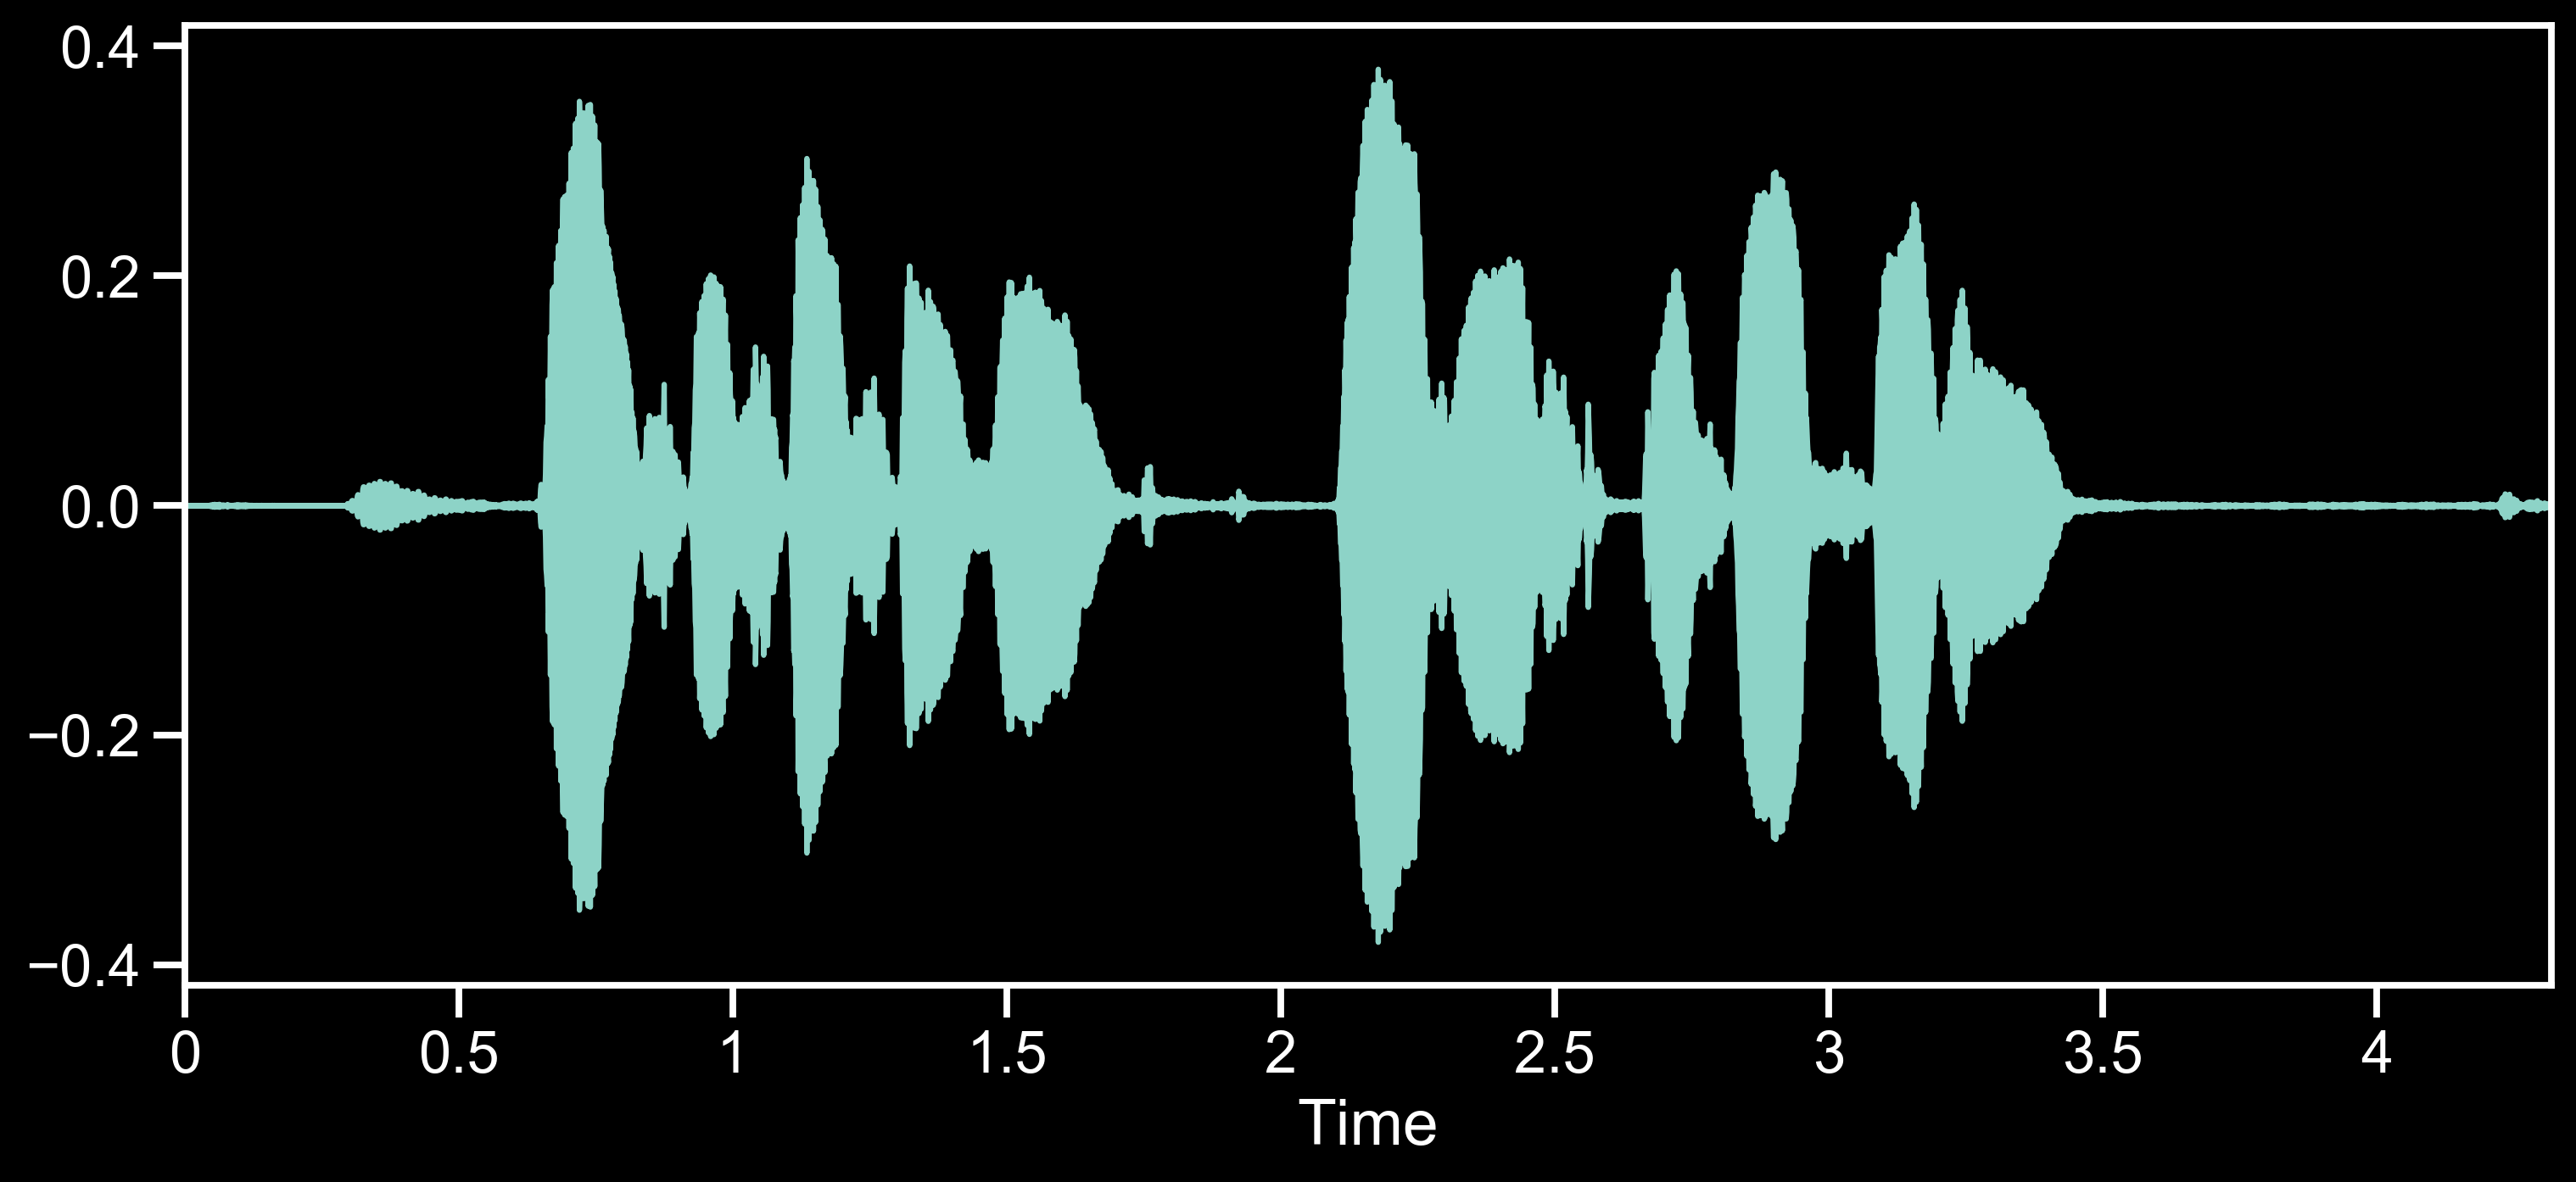

In [177]:
x, sr = librosa.load(audio_path)

plt.figure(figsize=(12, 5))
librosa.display.waveplot(x, sr=sr)
plt.show()

# Spectogram of the MFCCs

MFFCs shape: (20, 187)
First mffcs: [-568.4318  -566.2398  -553.32367 -552.8522  -558.14886]


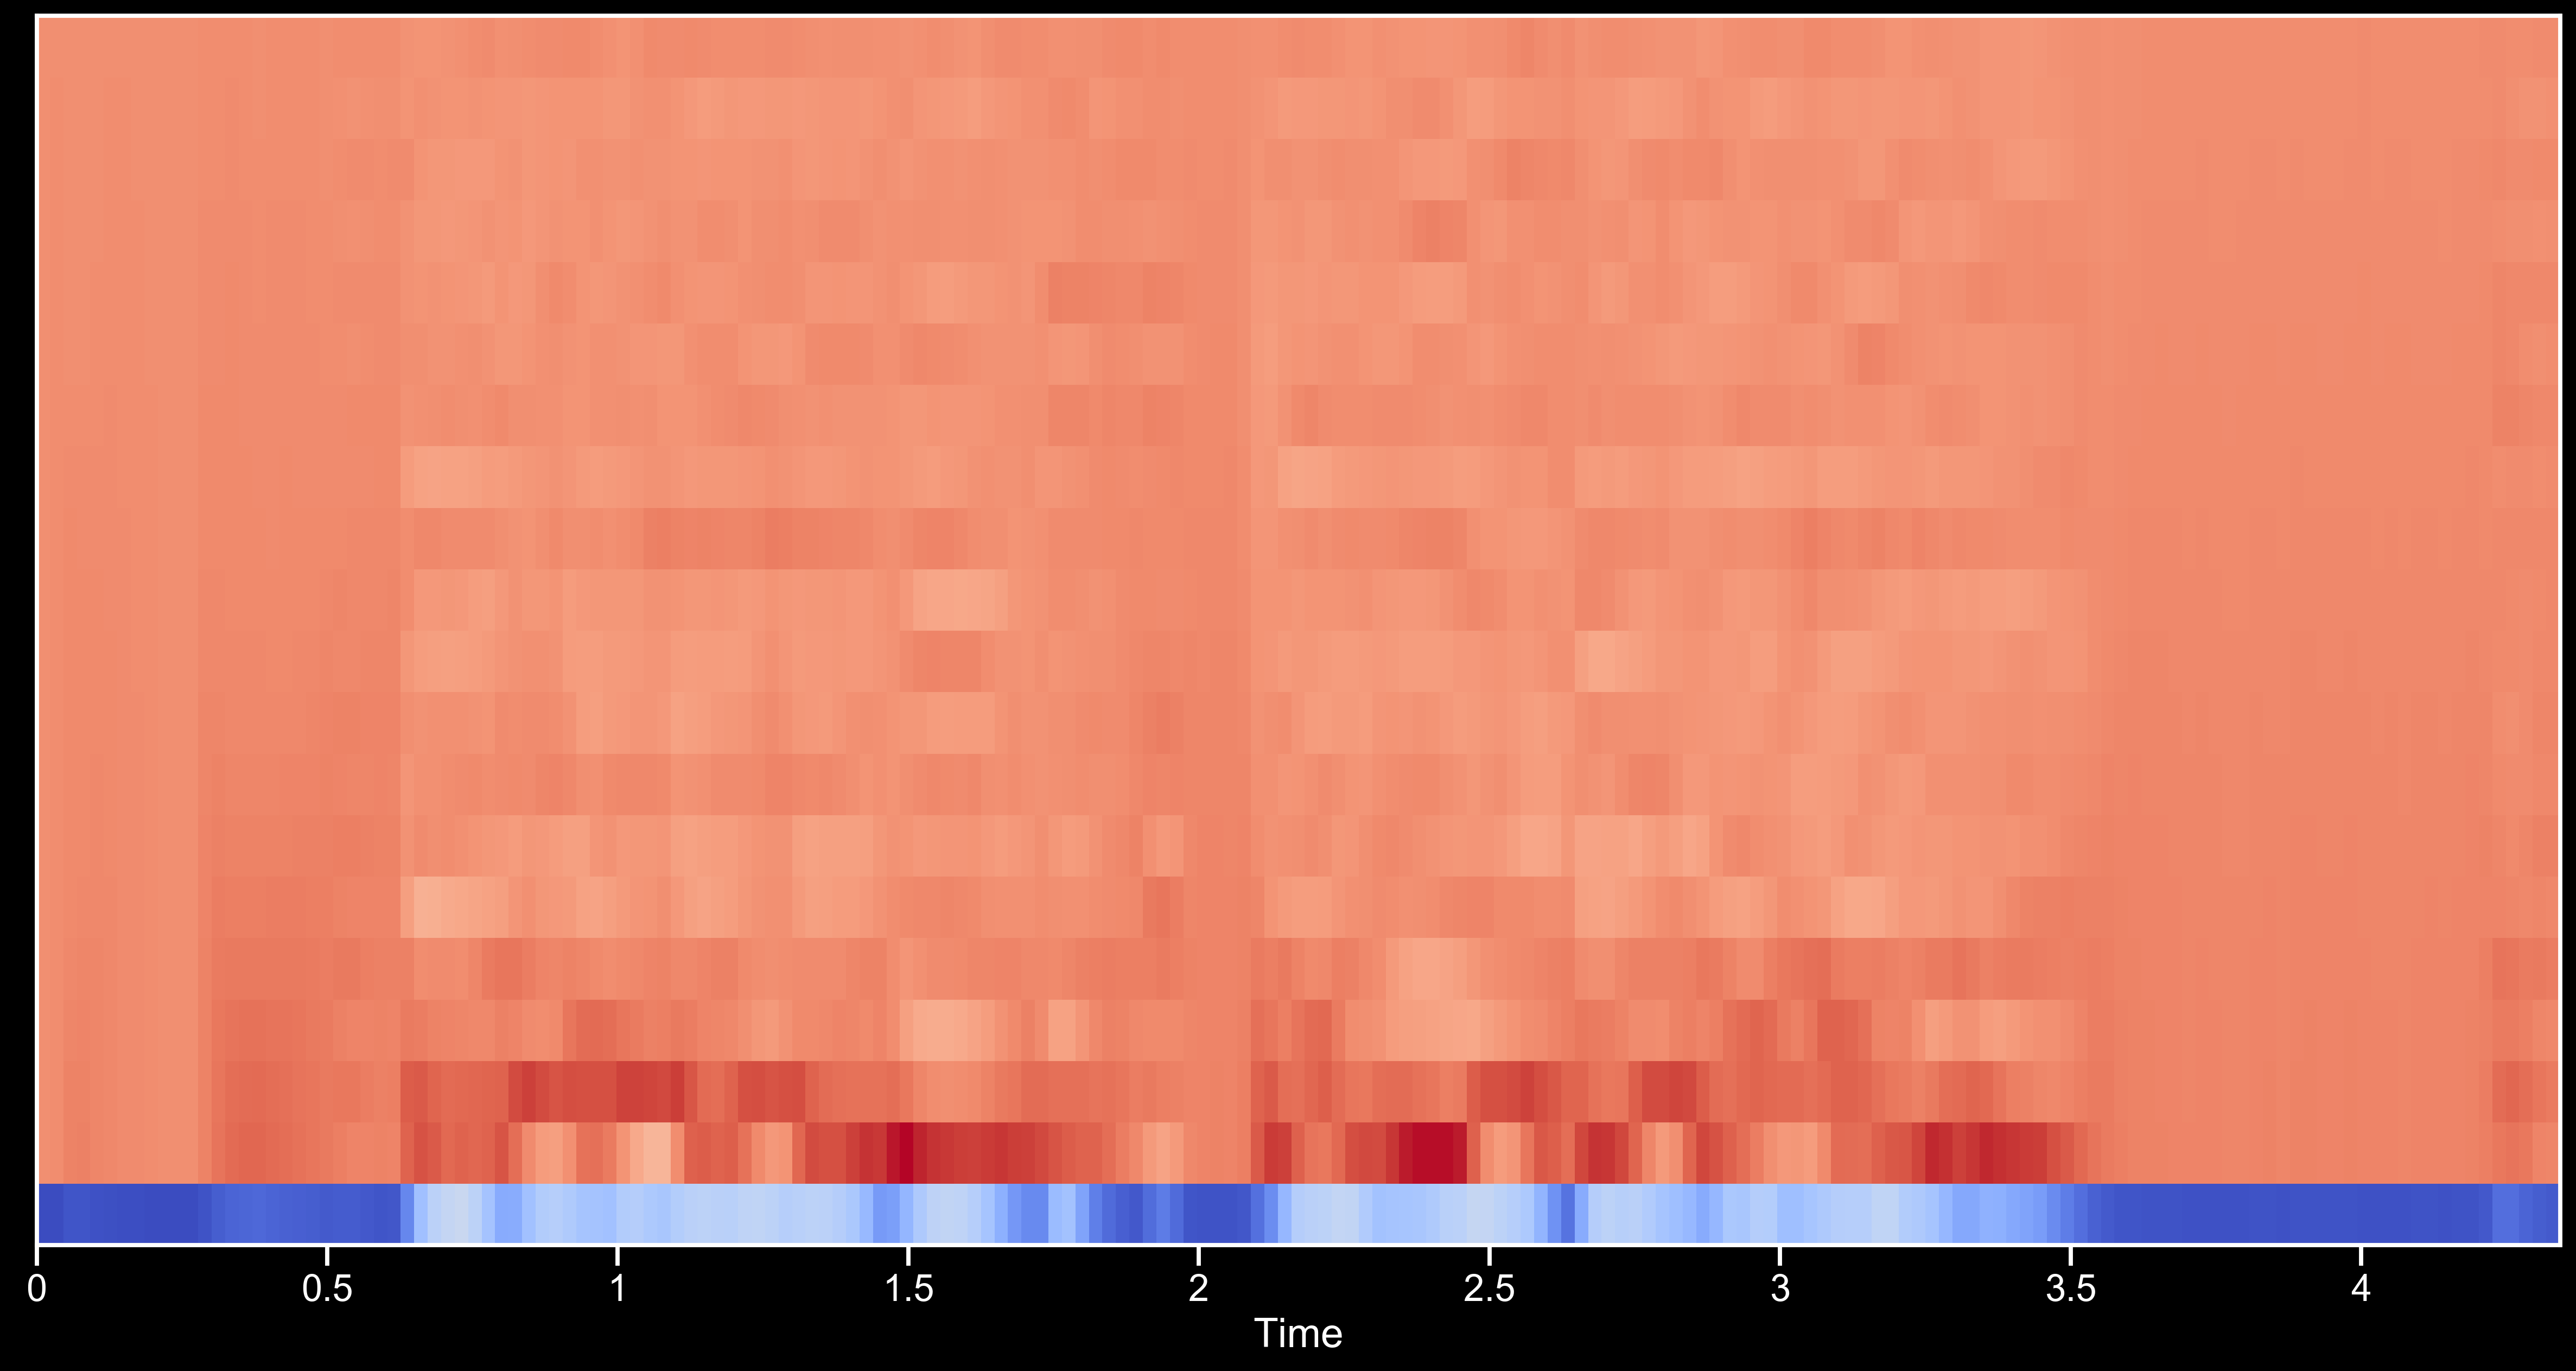

In [178]:
mfccs = librosa.feature.mfcc(x, sr=sr)
print(f'MFFCs shape: {mfccs.shape}')
print(f'First mffcs: {mfccs[0, :5]}')

librosa.display.specshow(mfccs, sr=sr, x_axis='time')
plt.show()

# Prepare Functions
* mean of MFCCs
* parse audio
* get samples

In [174]:
def mean_mfccs(x):
    return [np.mean(feature) for feature in librosa.feature.mfcc(x)]

def parse_audio(x):
    return x.flatten('F')[:x.shape[0]] 

def get_audios():
    train_path = path
    train_file_names = os.listdir(train_path)
    train_file_names.sort(key=lambda x: int(x.partition('.')[0]))
    
    samples = []
    for file_name in train_file_names:
        x, sr = sf.read(train_path + file_name, always_2d=True)
        x = parse_audio(x)
        samples.append(mean_mfccs(x))
        
    return np.array(samples)

def get_samples():
    df = pd.read_csv('voices.csv')
    return get_audios(), df['classID'].values

# Model, training and results

In [179]:
X, Y = get_samples()
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
model = KNeighborsClassifier(n_neighbors=3)
scores = cross_val_score(model, X, Y, cv=cv)
score = sum(scores)/len(scores)
print(score)

0.75
